In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#import sklearn
import sklearn.neural_network as nn
import sklearn.svm as svm
import sklearn.linear_model as lm
import sklearn.neighbors as neighbors
%matplotlib inline

### 1. 데이터 불러오기 및 데이터 파악

In [2]:
df = pd.read_csv('./32-Data-Data_Viz_Practice.csv.txt')
# df = pd.read_csv('./sklearn_practice.csv.txt')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.shape # 데이터 크기

(284807, 31)

#### 각 column의 시간별 데이터 변화 확인

Text(0, 0.5, 'V1')

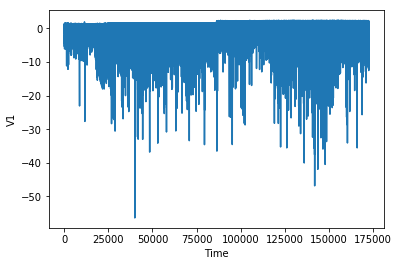

In [12]:
plt.subplot()
plt.plot(df['Time'], df['V1'])
plt.xlabel('Time')
plt.ylabel('V1')

# 조교

In [13]:
rawdata = pd.read_csv('./sklearn_practice.csv.txt')

In [17]:
class_zero = rawdata[rawdata['Class'] == 0]
class_one = rawdata[rawdata['Class'] == 1]

In [24]:
sampled = class_zero.sample(n=len(class_one)) # sampling
data = pd.concat([class_one, sampled])
data = data.sample(frac=1) # 데이터 전체에서 어느 정도 비율로 샘플링 할 것인지 frac=1이면 전부다
# 섞여서 출력됨

In [34]:
# train set
train_data = data[:700]
x_train = train_data.loc[:, 'Time':'Amount']
y_train = train_data.loc[:, 'Class']

# test set
test_data = data[700:]
x_test = test_data.loc[:, 'Time':'Amount']
y_test = test_data.loc[:, 'Class']


In [57]:
model = lm.LogisticRegression()
# model = svm.SVC(gamma='scale')
# model = neighbors.KNeighborsClassifier()
# model = nn.MLPClassifier(learning_rate=0.01)

In [58]:
model.fit(x_train, y_train)

C:\Users\DS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [59]:
y_pred = model.predict(x_test)

In [60]:
cnt = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test.iloc[i]:
        cnt += 1
print(cnt/len(y_pred))

0.9330985915492958


# 190807

#### 데이터 불균형 관련 실습
- 적은 수에 맞춰 under-sampling
- 적은 수를 많은 수에 맞춰 수를 키워 분석

In [36]:
rawdata = df

In [37]:
rawdata.shape

(284807, 31)

In [38]:
class_zero = rawdata[rawdata['Class'] == 0]
class_one = rawdata[rawdata['Class'] == 1]

In [39]:
data = pd.concat([class_zero, class_one])
train_data = data.iloc[100:-100]
test_data = pd.concat([data.iloc[:100], data.iloc[-100:]])

In [40]:
x_train = train_data.loc[:, 'Time':'Amount']
y_train = train_data.loc[:, 'Class']
# test set
x_test = test_data.loc[:, 'Time':'Amount']
y_test = test_data.loc[:, 'Class']

In [42]:
# model = lm.LogisticRegression()
# model = svm.SVC(gamma='scale')
# model = neighbors.KNeighborsClassifier()
model = nn.MLPClassifier(learning_rate_init=0.01)

In [43]:
model.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.01, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [44]:
y_pred = model.predict(x_test)

In [45]:
cnt = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test.iloc[i]:
        cnt += 1
print(cnt/len(y_pred))

0.5
